In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)             # To get diffent different colors
pd.set_option('display.max_columns', None)  # To display the max columns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [26]:
data=pd.read_csv("E:\\Naresh IT\\Sample\\Preprocessed_data.csv")
data

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4830,0,53,0,0,36.807595,-118.901544,0,1,5,42.09,0,2,9,0,0,0,0,0,0,0,1,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
4831,0,20,0,0,32.759327,-116.997260,0,13,4,46.68,0,1,59,1,0,0,1,0,0,1,1,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
4832,1,40,1,0,37.734971,-120.954271,1,22,4,16.20,1,2,17,0,0,0,0,0,1,1,1,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0
4833,1,22,0,0,39.108252,-123.645121,0,2,5,18.62,0,1,51,0,1,0,0,0,0,0,1,0,1,1,50.30,92.75,0.00,0,37.24,129.99,1


In [27]:
df=pd.read_csv("E:\\Naresh IT\\Sample\\telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg_Monthly_GB_Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [28]:
#EDA
df.shape
#38 columns
#7043 rows

(7043, 38)

In [29]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg_Monthly_GB_Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')

In [30]:
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg_Monthly_GB_Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [32]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg_Monthly_GB_Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,None,Yes,42.39,No,Yes,Cable,16.0,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,Offer D,Yes,27.82,No,Yes,Fiber Optic,4.0,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,None,Yes,7.38,No,Yes,Fiber Optic,11.0,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [33]:
# Drop identifier column
df.drop(columns = ['Customer ID', 'Zip Code'], inplace=True)
df.shape

(7043, 36)

In [34]:
df['City'].value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: City, Length: 1106, dtype: int64

In [35]:
# Drop city column because it have alot of unique value
df.drop(columns = 'City',
          inplace=True)
df.shape

(7043, 35)

In [36]:
cat_vars = df.select_dtypes(include='object').columns.tolist()
len(cat_vars)

# There are 21 cat columns are there

21

In [37]:
df.select_dtypes(include='object')#categoricla cols
df.select_dtypes(include='object').columns.tolist()

['Gender',
 'Married',
 'Offer',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Internet Type',
 'Online Security',
 'Online Backup',
 'Device Protection Plan',
 'Premium Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Streaming Music',
 'Unlimited Data',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Customer Status',
 'Churn Category',
 'Churn Reason']

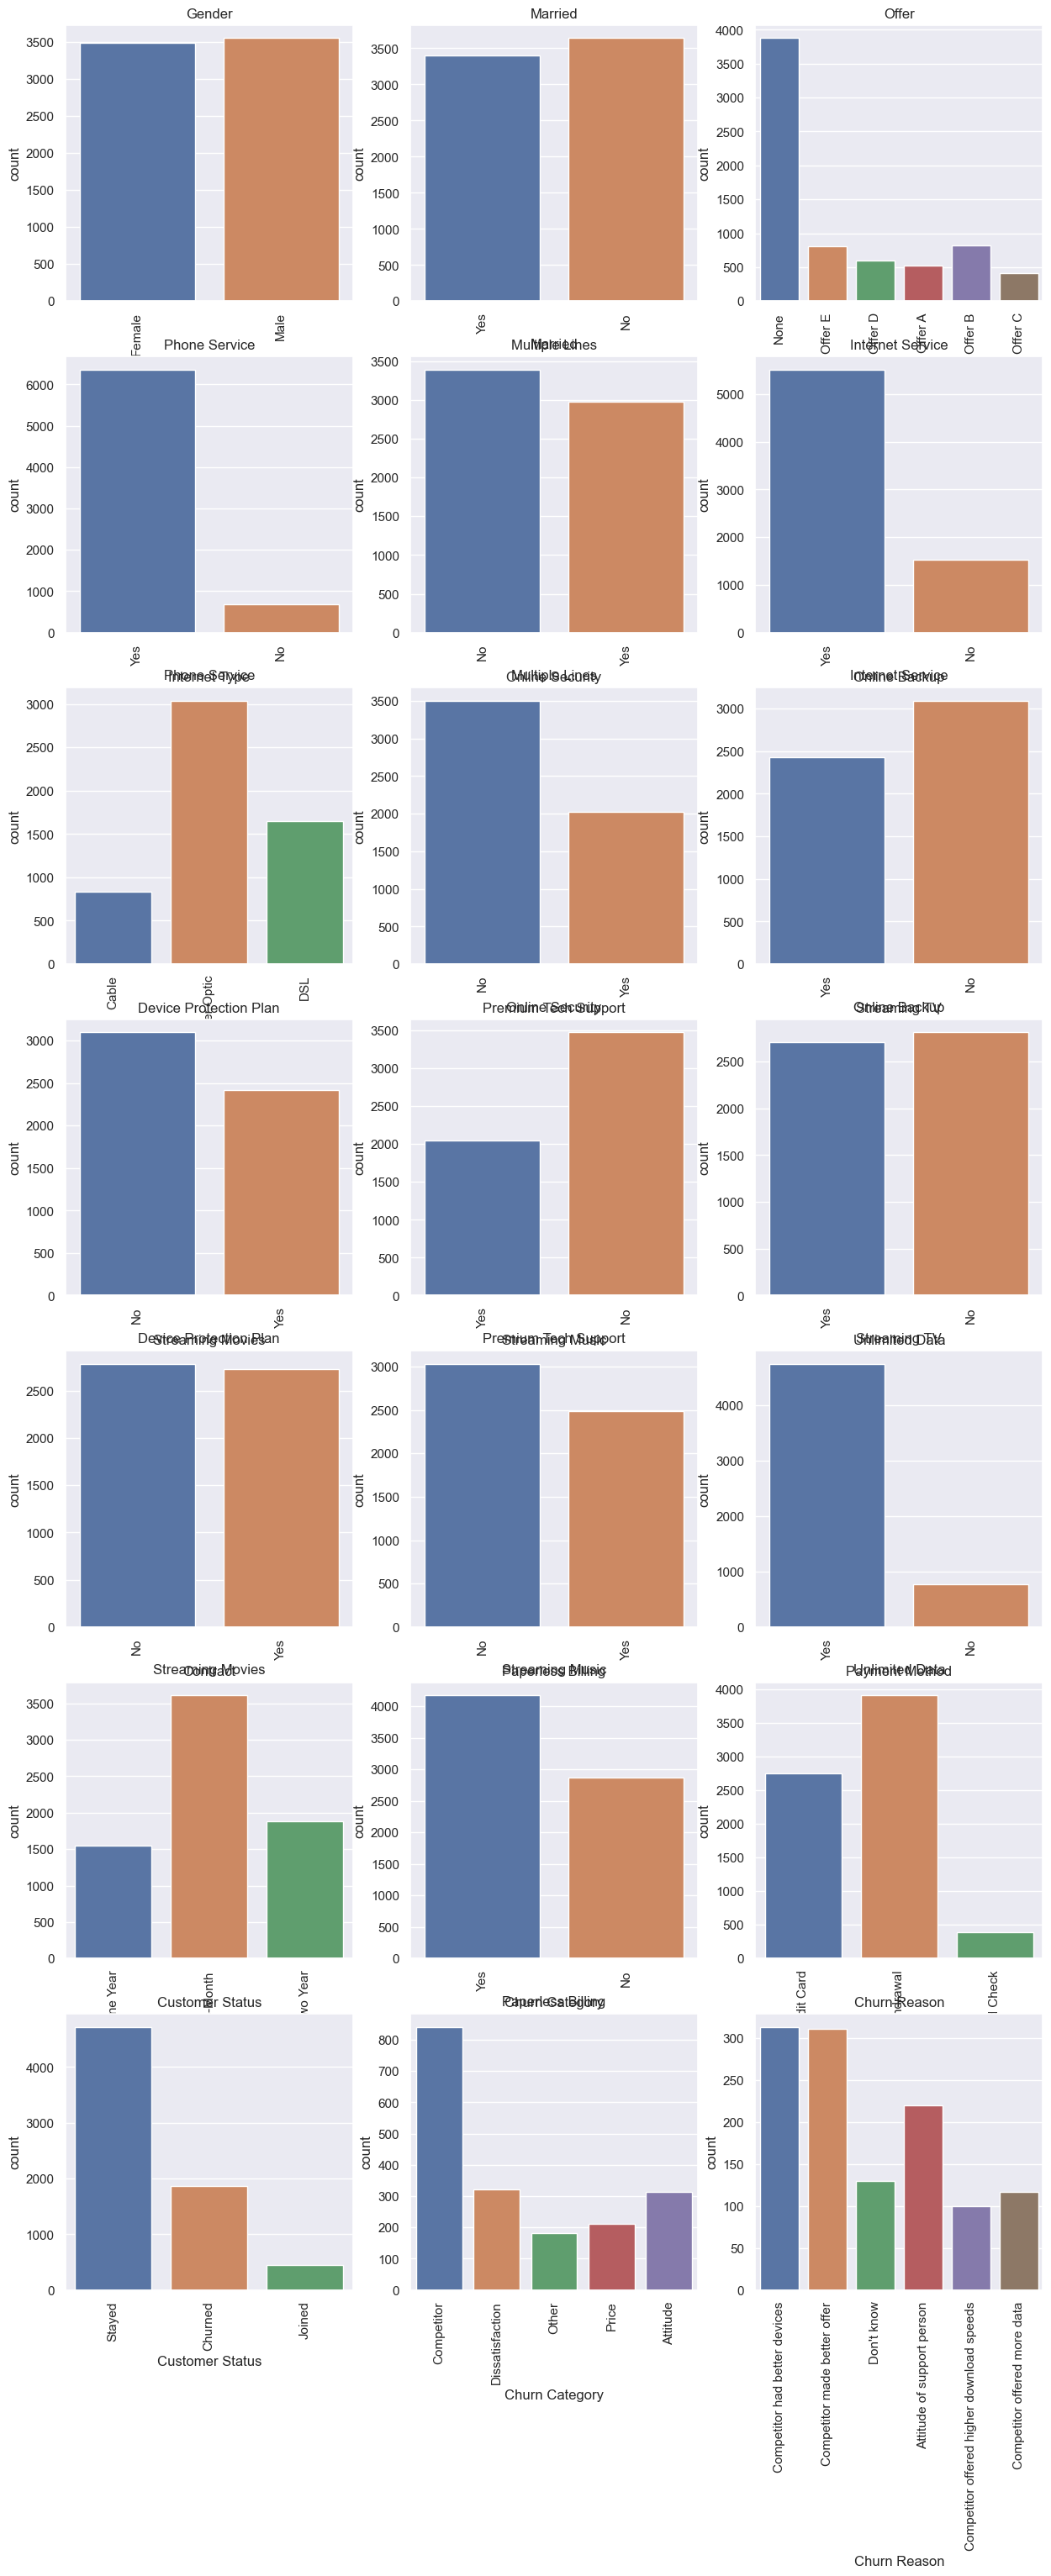

In [38]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn

for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)

In [39]:
for i, var in enumerate(cat_vars):#id var--21columns
    print(i,var)
    print(df[var].value_counts().nlargest(6).index) #top 6 will come

0 Gender
Index(['Male', 'Female'], dtype='object')
1 Married
Index(['No', 'Yes'], dtype='object')
2 Offer
Index(['None', 'Offer B', 'Offer E', 'Offer D', 'Offer A', 'Offer C'], dtype='object')
3 Phone Service
Index(['Yes', 'No'], dtype='object')
4 Multiple Lines
Index(['No', 'Yes'], dtype='object')
5 Internet Service
Index(['Yes', 'No'], dtype='object')
6 Internet Type
Index(['Fiber Optic', 'DSL', 'Cable'], dtype='object')
7 Online Security
Index(['No', 'Yes'], dtype='object')
8 Online Backup
Index(['No', 'Yes'], dtype='object')
9 Device Protection Plan
Index(['No', 'Yes'], dtype='object')
10 Premium Tech Support
Index(['No', 'Yes'], dtype='object')
11 Streaming TV
Index(['No', 'Yes'], dtype='object')
12 Streaming Movies
Index(['No', 'Yes'], dtype='object')
13 Streaming Music
Index(['No', 'Yes'], dtype='object')
14 Unlimited Data
Index(['Yes', 'No'], dtype='object')
15 Contract
Index(['Month-to-Month', 'Two Year', 'One Year'], dtype='object')
16 Paperless Billing
Index(['Yes', 'No'], d

In [40]:
df['Married'].value_counts().nlargest(2).index #top 6 will come

Index(['No', 'Yes'], dtype='object')

In [41]:
df[df[var].isin(top_values)]


,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg_Monthly_GB_Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer Status,Churn Category,Churn Reason
2,Male,50,No,0,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
19,Male,67,No,0,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.00,0,0.00,25.10,Churned,Competitor,Competitor made better offer
21,Female,26,Yes,0,39.227434,-120.091806,1,13,None,Yes,43.56,Yes,Yes,Fiber Optic,52.0,No,Yes,Yes,No,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,94.10,1215.60,0.00,0,566.28,1781.88,Churned,Other,Don't know
40,Male,69,No,0,32.961064,-117.134917,0,2,None,Yes,43.99,No,Yes,DSL,27.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,49.25,91.10,0.00,0,87.98,179.08,Churned,Competitor,Competitor made better offer
53,Male,51,No,0,33.832799,-116.250973,0,40,None,Yes,37.69,Yes,Yes,Fiber Optic,15.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,104.50,4036.85,0.00,0,1507.60,5544.45,Churned,Competitor,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Female,55,No,0,36.220761,-120.980777,0,3,Offer E,Yes,47.62,No,Yes,Cable,29.0,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.10,307.40,0.00,0,142.86,450.26,Churned,Competitor,Competitor had better devices
7012,Male,65,No,0,34.097345,-117.906736,0,15,Offer D,Yes,29.11,No,Yes,Fiber Optic,29.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.40,1074.30,0.00,0,436.65,1510.95,Churned,Competitor,Competitor had better devices
7013,Male,44,Yes,0,38.018065,-122.546024,1,38,None,Yes,35.61,No,Yes,Fiber Optic,13.0,Yes,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.45,3013.05,9.36,40,1353.18,4396.87,Churned,Competitor,Competitor offered more data
7036,Female,53,No,0,36.807595,-118.901544,0,1,Offer E,Yes,42.09,No,Yes,Fiber Optic,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0.00,0,42.09,112.24,Churned,Competitor,Competitor had better devices


In [42]:
top_values = df['Married'].value_counts().nlargest(1).index
filtered_df = df[df['Married'].isin(top_values)]
filtered_df

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg_Monthly_GB_Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer Status,Churn Category,Churn Reason
1,Male,46,No,0,34.162515,-118.203869,0,9,None,Yes,10.69,Yes,Yes,Cable,10.0,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
5,Female,23,No,3,37.581496,-119.972762,0,9,Offer E,Yes,16.77,No,Yes,Cable,73.0,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Stayed,NaN,NaN
8,Female,68,No,0,34.296813,-118.685703,0,7,Offer E,Yes,10.53,No,Yes,DSL,21.0,Yes,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Stayed,NaN,NaN
10,Male,47,No,0,32.993560,-117.207121,0,54,None,No,NaN,NaN,Yes,Cable,10.0,Yes,No,No,Yes,Yes,No,No,Yes,Two Year,No,Credit Card,45.20,2460.55,0.00,0,0.00,2460.55,Stayed,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,Female,20,No,0,34.023810,-118.156582,0,7,Offer E,Yes,36.49,No,Yes,Fiber Optic,42.0,No,Yes,No,No,Yes,Yes,Yes,Yes,One Year,Yes,Credit Card,94.05,633.45,0.00,0,255.43,888.88,Stayed,NaN,NaN
7036,Female,53,No,0,36.807595,-118.901544,0,1,Offer E,Yes,42.09,No,Yes,Fiber Optic,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0.00,0,42.09,112.24,Churned,Competitor,Competitor had better devices
7037,Female,36,No,0,33.362575,-117.299644,0,4,None,Yes,2.01,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Month-to-Month,No,Bank Withdrawal,20.95,85.50,0.00,0,8.04,93.54,Churned,Competitor,Competitor made better offer
7038,Female,20,No,0,32.759327,-116.997260,0,13,Offer D,Yes,46.68,No,Yes,DSL,59.0,Yes,No,No,Yes,No,No,Yes,Yes,One Year,No,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN


In [43]:
# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

In [44]:
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars

['Age',
 'Number of Dependents',
 'Latitude',
 'Longitude',
 'Number of Referrals',
 'Tenure in Months',
 'Avg Monthly Long Distance Charges',
 'Avg_Monthly_GB_Download',
 'Monthly_Charge',
 'Total_Charges',
 'Total_Refunds',
 'Total_Extra_Data_Charges',
 'Total_Long_Distance_Charges',
 'Total_Revenue']

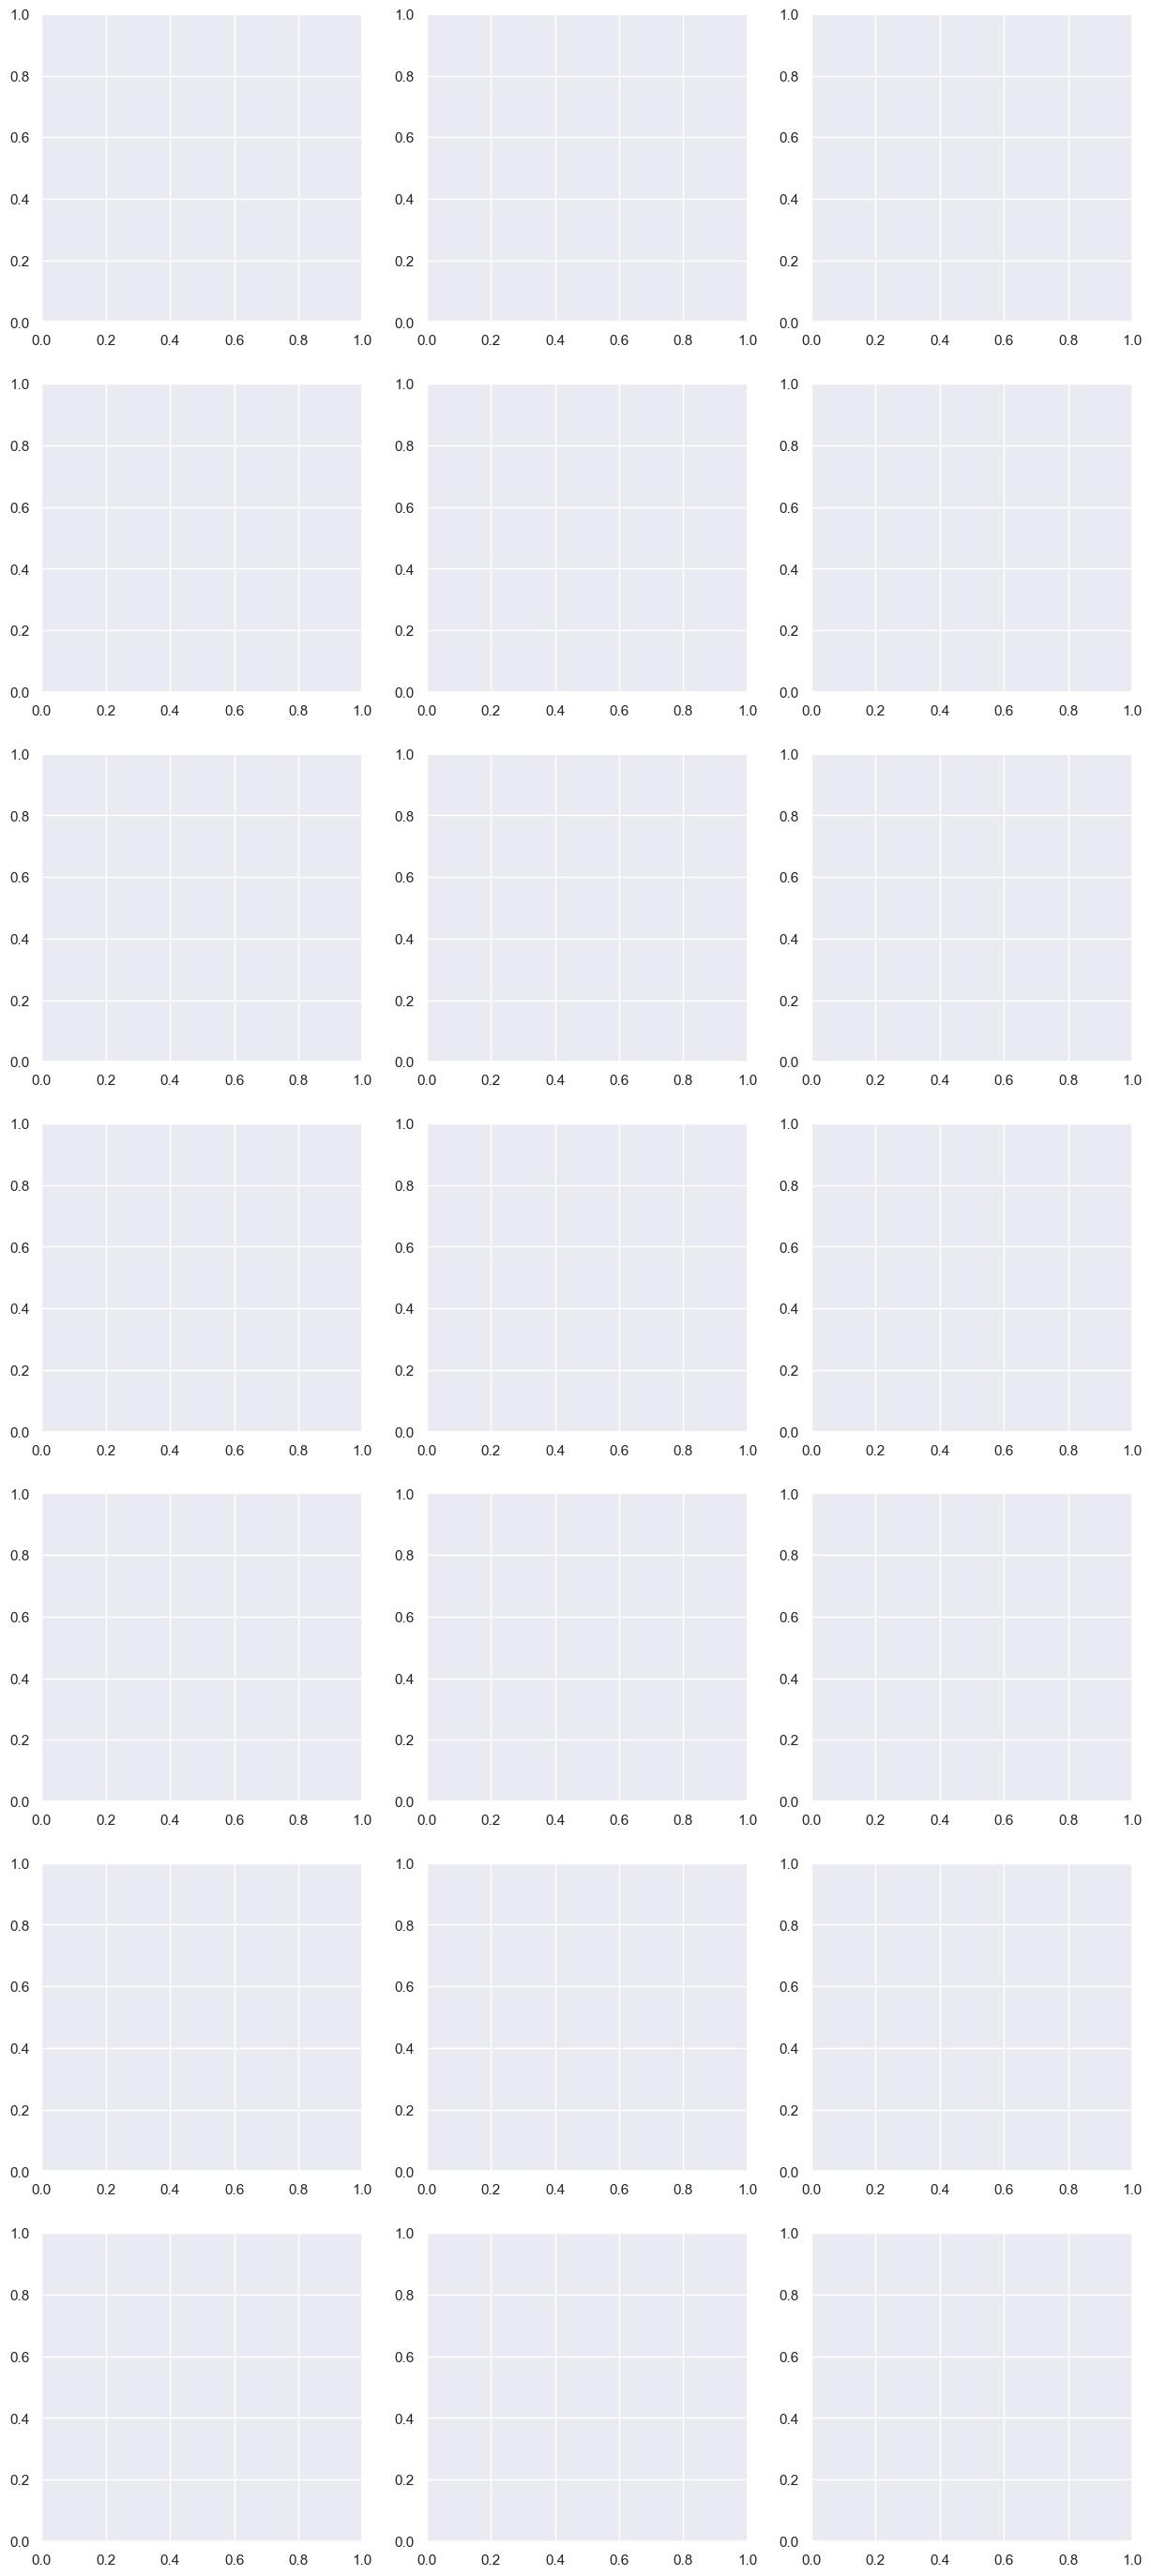

In [45]:
# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

In [46]:
for i, var in enumerate(cat_vars):#id var--21columns
    top_values = df[var].value_counts().nlargest(6).index
    print(top_values)

Index(['Male', 'Female'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['None', 'Offer B', 'Offer E', 'Offer D', 'Offer A', 'Offer C'], dtype='object')
Index(['Yes', 'No'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['Yes', 'No'], dtype='object')
Index(['Fiber Optic', 'DSL', 'Cable'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['No', 'Yes'], dtype='object')
Index(['Yes', 'No'], dtype='object')
Index(['Month-to-Month', 'Two Year', 'One Year'], dtype='object')
Index(['Yes', 'No'], dtype='object')
Index(['Bank Withdrawal', 'Credit Card', 'Mailed Check'], dtype='object')
Index(['Stayed', 'Churned', 'Joined'], dtype='object')
Index(['Competitor', 'Dissatisfaction', 'Attitude', 'Price', 'Other'], dtype='object')
Index(['Competitor had better devices', 'Competitor m

In [47]:
df[df[var].isin(top_values)]

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg_Monthly_GB_Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer Status,Churn Category,Churn Reason
2,Male,50,No,0,33.645672,-117.922613,0,4,Offer E,Yes,33.65,No,Yes,Fiber Optic,30.0,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
19,Male,67,No,0,37.161544,-121.649371,0,1,None,No,NaN,NaN,Yes,Cable,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,25.10,25.10,0.00,0,0.00,25.10,Churned,Competitor,Competitor made better offer
21,Female,26,Yes,0,39.227434,-120.091806,1,13,None,Yes,43.56,Yes,Yes,Fiber Optic,52.0,No,Yes,Yes,No,Yes,No,No,Yes,Month-to-Month,No,Bank Withdrawal,94.10,1215.60,0.00,0,566.28,1781.88,Churned,Other,Don't know
40,Male,69,No,0,32.961064,-117.134917,0,2,None,Yes,43.99,No,Yes,DSL,27.0,Yes,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,49.25,91.10,0.00,0,87.98,179.08,Churned,Competitor,Competitor made better offer
53,Male,51,No,0,33.832799,-116.250973,0,40,None,Yes,37.69,Yes,Yes,Fiber Optic,15.0,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,104.50,4036.85,0.00,0,1507.60,5544.45,Churned,Competitor,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,Female,55,No,0,36.220761,-120.980777,0,3,Offer E,Yes,47.62,No,Yes,Cable,29.0,No,Yes,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,95.10,307.40,0.00,0,142.86,450.26,Churned,Competitor,Competitor had better devices
7012,Male,65,No,0,34.097345,-117.906736,0,15,Offer D,Yes,29.11,No,Yes,Fiber Optic,29.0,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,74.40,1074.30,0.00,0,436.65,1510.95,Churned,Competitor,Competitor had better devices
7013,Male,44,Yes,0,38.018065,-122.546024,1,38,None,Yes,35.61,No,Yes,Fiber Optic,13.0,Yes,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.45,3013.05,9.36,40,1353.18,4396.87,Churned,Competitor,Competitor offered more data
7036,Female,53,No,0,36.807595,-118.901544,0,1,Offer E,Yes,42.09,No,Yes,Fiber Optic,9.0,No,No,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,70.15,70.15,0.00,0,42.09,112.24,Churned,Competitor,Competitor had better devices


In [48]:
check_missing=df.isnull().sum() * 100 / df.shape[0]
check_missing[a>0].sort_values(ascending=False)

NameError: name 'a' is not defined

In [49]:
# Change Joined into stayed, so we can make binary classification
# Replace all values in the 'Customer Status' column with 'Stayed'
df['Customer Status'] = df['Customer Status'].replace('Joined', 'Stayed')
df['Customer Status'].value_counts()

Stayed     5174
Churned    1869
Name: Customer Status, dtype: int64

In [50]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
Married: ['Yes' 'No']
Offer: ['None' 'Offer E' 'Offer D' 'Offer A' 'Offer B' 'Offer C']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' nan]
Internet Service: ['Yes' 'No']
Internet Type: ['Cable' 'Fiber Optic' 'DSL' nan]
Online Security: ['No' 'Yes' nan]
Online Backup: ['Yes' 'No' nan]
Device Protection Plan: ['No' 'Yes' nan]
Premium Tech Support: ['Yes' 'No' nan]
Streaming TV: ['Yes' 'No' nan]
Streaming Movies: ['No' 'Yes' nan]
Streaming Music: ['No' 'Yes' nan]
Unlimited Data: ['Yes' 'No' nan]
Contract: ['One Year' 'Month-to-Month' 'Two Year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Credit Card' 'Bank Withdrawal' 'Mailed Check']
Customer Status: ['Stayed' 'Churned']
Churn Category: [nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']
Churn Reason: [nan 'Competitor had better devices' 'Product dissatisfaction'
 'Network reliability' 'Limited range of services'
 'Competitor made better offer' "Don't know" 'Long distance charges'
 'A

In [51]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Gender: [0 1]
Married: [1 0]
Offer: [0 5 4 1 2 3]
Phone Service: [1 0]
Multiple Lines: [0 1 2]
Internet Service: [1 0]
Internet Type: [0 2 1 3]
Online Security: [0 1 2]
Online Backup: [1 0 2]
Device Protection Plan: [0 1 2]
Premium Tech Support: [1 0 2]
Streaming TV: [1 0 2]
Streaming Movies: [0 1 2]
Streaming Music: [0 1 2]
Unlimited Data: [1 0 2]
Contract: [1 0 2]
Paperless Billing: [1 0]
Payment Method: [1 0 2]
Customer Status: [1 0]
Churn Category: [5 1 2 3 4 0]
Churn Reason: [20  2 18 14 11  3  7 12  0  1  4  5  9  6 13 19 17 10 15  8 16]


In [52]:
# Remove Internet Service and Phone Service column because of zero correlation
df.drop(columns = ['Internet Service', 'Phone Service'], inplace=True)
df.shape

(7043, 33)

In [53]:
df.shape

(7043, 33)

In [54]:
data=pd.read_csv("E:\\Naresh IT\\Sample\\Preprocessed_data.csv")
data.head()

,Gender,Age,Married,Number of Dependents,Latitude,Longitude,Number of Referrals,Tenure in Months,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,34.827662,-118.999073,2,9,0,42.39,0,0,16,0,1,0,1,1,0,0,1,1,1,1,65.6,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,34.162515,-118.203869,0,9,0,10.69,1,0,10,0,0,0,0,0,1,1,0,0,0,1,-4.0,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,33.645672,-117.922613,0,4,5,33.65,0,2,30,0,0,1,0,0,0,0,1,0,1,0,73.9,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,38.014457,-122.115432,1,13,4,27.82,0,2,4,0,1,1,0,1,1,0,1,0,1,0,98.0,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,34.227846,-119.079903,3,3,0,7.38,0,2,11,0,0,0,1,1,0,0,1,0,1,1,83.9,267.40,0.00,0,22.14,289.54,0


# Target_columns= 'Customer Status'
# Other than customer status all are input columns
𝑆𝑡𝑒𝑝−1
 : Model development

- Devide the data

In [55]:
X=data.drop('Customer Status',axis=1)
y=data['Customer Status']

- train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=1234,
                                                    test_size=0.30)

In [57]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3384, 30), (1451, 30), (3384,), (1451,))

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

𝑆𝑡𝑒𝑝−2
 : Predictions

In [59]:
# For predictions need to pass X_test
y_pred_dt=dt.predict(X_test)
y_pred_dt

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

Metrics
- Confusion - matrix

In [60]:
dt_accuracy=accuracy_score(y_pred_dt,y_test)
dt_accuracy

0.7539627842866988

Confusion - matrix

In [61]:
dt_cmt=confusion_matrix(y_pred_dt,y_test)
dt_cmt

array([[298, 199],
       [158, 796]], dtype=int64)

<Axes: >

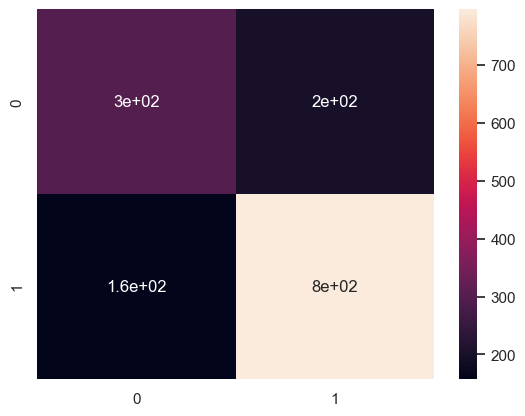

In [62]:
sns.heatmap(dt_cmt,annot=True)
#curned = 0
#styed = 1

In [63]:
tn, fp, fn ,tp = dt_cmt.ravel()
print('True negative',tn)
print('False positive',fp)
print('False negative',fn)
print('True positive',tp)

True negative 298
False positive 199
False negative 158
True positive 796


In [64]:
pr=tp/(tp+fp)
pr

0.8

In [65]:
dt_precision=precision_score(y_pred_dt,y_test)
dt_precision

0.8

In [66]:
rc=tp/(tp+fn)
rc

0.8343815513626834

In [67]:
dt_recall=recall_score(y_pred_dt,y_test)
dt_recall

0.8343815513626834

In [68]:
dt_f1=f1_score(y_pred_dt,y_test)
dt_f1

0.8168291431503335

In [69]:
dt_metrics={}
dt_metrics['accuracy']=round(dt_accuracy,2)
dt_metrics['precision']=round(dt_precision,2)
dt_metrics['recall']=round(dt_recall,2)
dt_metrics['F1']=round(dt_f1,2)
dt_metrics

{'accuracy': 0.75, 'precision': 0.8, 'recall': 0.83, 'F1': 0.82}

In [70]:
metrics_dt=pd.DataFrame(dt_metrics,index=['Decsion Tree'])
metrics_dt

,accuracy,precision,recall,F1
Decsion Tree,0.75,0.8,0.83,0.82


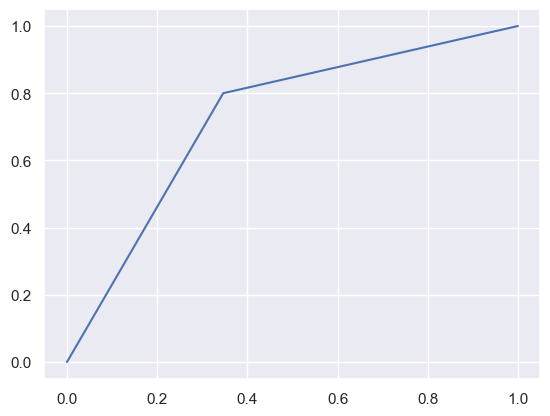

In [71]:
y_dt_pred=dt.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_dt_pred)
plt.plot(fpr,tpr)
plt.show()

KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
y_pred_knn=knn.predict(X_test)
y_pred_knn

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

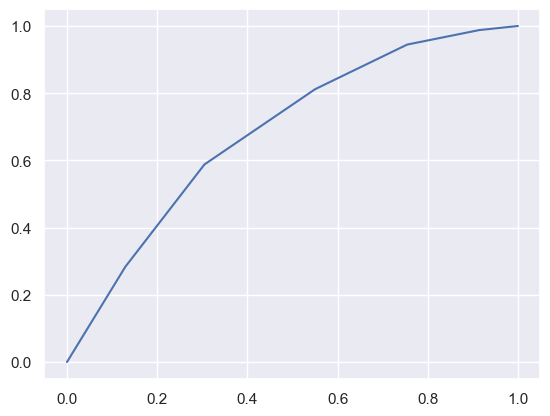

In [74]:
knn_cmt= confusion_matrix(y_pred_knn,y_test)
knn_accuracy= accuracy_score(y_pred_knn,y_test)
knn_precision= precision_score(y_pred_knn,y_test)
knn_recall= recall_score(y_pred_knn,y_test)
knn_f1= f1_score(y_pred_knn,y_test)
knn_metrics={}
knn_metrics['accuracy']=round(knn_accuracy,2)
knn_metrics['precision']=round(knn_precision,2)
knn_metrics['recall']=round(knn_recall,2)
knn_metrics['F1']=round(knn_f1,2)
knn_metrics

############################ roc_curve #########################

y_knn_pred=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_knn_pred)
plt.plot(fpr,tpr)
plt.show()

<Axes: >

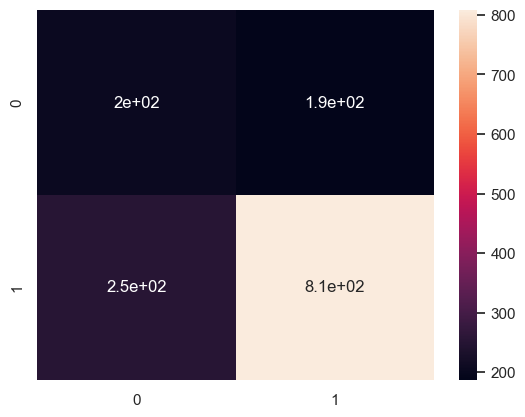

In [75]:
sns.heatmap(knn_cmt,annot=True)
#curned = 0
#styed = 1

In [76]:
tn, fp, fn ,tp = knn_cmt.ravel()
print('True negative',tn)
print('False positive',fp)
print('False negative',fn)
print('True positive',tp)

True negative 205
False positive 187
False negative 251
True positive 808


NB

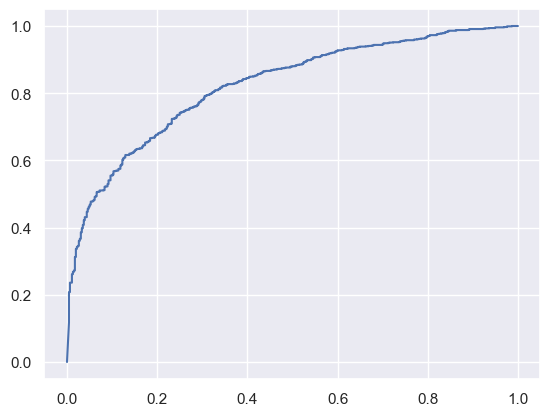

In [77]:
#########################
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
##########################################
y_pred_nb=nb.predict(X_test)
y_pred_nb
###########################################
nb_cmt= confusion_matrix(y_pred_nb,y_test)
nb_accuracy= accuracy_score(y_pred_nb,y_test)
nb_precision= precision_score(y_pred_nb,y_test)
nb_recall= recall_score(y_pred_nb,y_test)
nb_f1= f1_score(y_pred_nb,y_test)
nb_metrics={}
nb_metrics['accuracy']=round(nb_accuracy,2)
nb_metrics['precision']=round(nb_precision,2)
nb_metrics['recall']=round(nb_recall,2)
nb_metrics['F1']=round(nb_f1,2)
nb_metrics
#######################################
#sns.heatmap(nb_cmt,annot=True)

############################ roc_curve #########################

y_nb_pred=nb.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_nb_pred)
plt.plot(fpr,tpr)
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


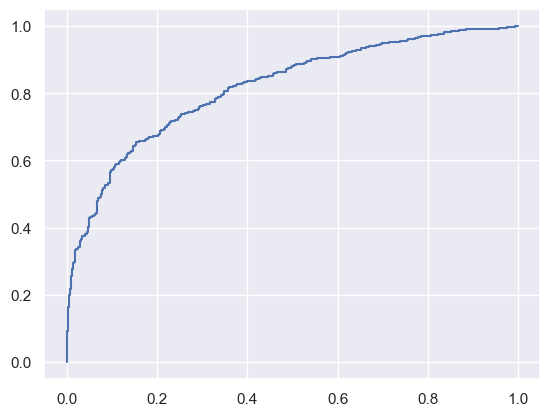

In [78]:
#########################Logistic Regression #########################
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
########################## Prediction ########################
y_pred_lr=lr.predict(X_test)
y_pred_lr
######################### Confusion metrix ###################
lr_cmt= confusion_matrix(y_pred_lr,y_test)

######################### metrix ###################
lr_accuracy= accuracy_score(y_pred_lr,y_test)
lr_precision= precision_score(y_pred_lr,y_test)
lr_recall= recall_score(y_pred_lr,y_test)
lr_f1= f1_score(y_pred_lr,y_test)

lr_metrics={}
lr_metrics['accuracy']=round(lr_accuracy,2)
lr_metrics['precision']=round(lr_precision,2)
lr_metrics['recall']=round(lr_recall,2)
lr_metrics['F1']=round(lr_f1,2)
lr_metrics
#######################################
#sns.heatmap(knn_cmt,annot=True)

############################ roc_curve #########################
y_lr_pred=lr.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_lr_pred)
plt.plot(fpr,tpr)
plt.show()

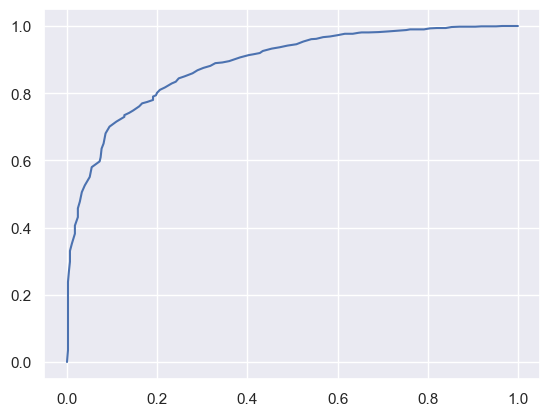

In [79]:
#########################Random forest #########################
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
########################## Prediction ########################
y_pred_rf=rf.predict(X_test)
y_pred_rf
######################### Confusion metrix ###################
rf_cmt= confusion_matrix(y_pred_rf,y_test)

######################### metrix ###################
rf_accuracy= accuracy_score(y_pred_rf,y_test)
rf_precision= precision_score(y_pred_rf,y_test)
rf_recall= recall_score(y_pred_rf,y_test)
rf_f1= f1_score(y_pred_rf,y_test)

rf_metrics={}
rf_metrics['accuracy']=round(rf_accuracy,2)
rf_metrics['precision']=round(rf_precision,2)
rf_metrics['recall']=round(rf_recall,2)
rf_metrics['F1']=round(rf_f1,2)
rf_metrics
#######################################
#sns.heatmap(knn_cmt,annot=True)

############################ roc_curve #########################

y_rf_pred=rf.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_rf_pred)
plt.plot(fpr,tpr)
plt.show()

# With Hyperparameter tuning

### Hyper parameter tuning

- A hyperparameter is a parameter of a model is apply before the learning process

- Different machine learning algorithms have different hyperparameters

- We will use GridserachCV

- GridSearchCV takes many hyperparameters as we like and tries every single possible combination

- It will apply Cross validation (CV)

- GridSeravhCV is a best method but time consuming

## Decision Tree

In [80]:
data=pd.read_csv("E:\\Naresh
                 IT\\Sample\\Preprocessed_data.csv")
data.head()

SyntaxError: unterminated string literal (detected at line 1) (3677567717.py, line 1)

In [ ]:
X=data.drop('Customer Status',axis=1)
y=data['Customer Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=1234,
                                                    test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
grid_tree=DecisionTreeClassifier()
grid_tree

In [ ]:
grid_tree.get_params()

In [ ]:
DT_params=[keys for keys in grid_tree.get_params()]
DT_params

In [ ]:
# You need to create dictonary with hyper parameters
param_grid = {
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

In [ ]:
# now these parameters to apply in a DT model
grid_search = GridSearchCV(grid_tree,  # Base modl
                           param_grid, # params
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True) # cross validation
grid_search

In [ ]:
# train the model
import time
st=time.time()
grid_search.fit(X_train,y_train)

# It is searching for best fit
end=time.time()
print('Total is',end-st)

In [ ]:
# Best parameters are
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
# cross validayion score
cross_val_score(grid_search.best_estimator_,
                X_train,
                y_train,
                scoring='accuracy')

In [ ]:
# cross validayion score
cross_val_score(grid_search.best_estimator_,
                X_train,
                y_train,
                scoring='accuracy').mean()

In [81]:
dict1={'Accuracy':[acc_dt,acc_KNN,acc_log,acc_NB,acc_RF],
      "Precision":[precision_dt,precision_KNN,precision_log,precision_NB,precision_RF],
      "Recall":[recall_dt,recall_KNN,recall_log,recall_NB,recall_RF],
      "F1-score":[f1_dt,f1_KNN,f1_log,f1_NB,f1_RF]}

pd.DataFrame(dict1,index=['DT','KNN','Logistic','Naive Bayes','Random Forest'])

NameError: name 'acc_dt' is not defined